Mini Project: Exploration of Infant Mortality Data in certain countries. 


In [18]:
#import libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
#load data into dataframe
data = pd.read_csv('../world-development-indicators/Indicators.csv')
data.shape

(5656458, 6)

In [103]:
#view list of unique countries
countries = data['CountryName'].unique().tolist()
countries[:5]

['Arab World',
 'Caribbean small states',
 'Central Europe and the Baltics',
 'East Asia & Pacific (all income levels)',
 'East Asia & Pacific (developing only)']

In [104]:
#view list of unique indicator names
indicator_names = data['IndicatorName'].unique().tolist()
indicator_names[:10]

['Adolescent fertility rate (births per 1,000 women ages 15-19)',
 'Age dependency ratio (% of working-age population)',
 'Age dependency ratio, old (% of working-age population)',
 'Age dependency ratio, young (% of working-age population)',
 'Arms exports (SIPRI trend indicator values)',
 'Arms imports (SIPRI trend indicator values)',
 'Birth rate, crude (per 1,000 people)',
 'CO2 emissions (kt)',
 'CO2 emissions (metric tons per capita)',
 'CO2 emissions from gaseous fuel consumption (% of total)']

In [93]:
hist_indicatorA = 'Mortality rate, infant \(per'
hist_countries = ['United States','Canada','Switzerland', 'France','United Kingdom', 'New Zealand']

mask1 = data['IndicatorName'].str.contains(hist_indicatorA) 
mask2 = data['CountryName'].isin(hist_countries)

#apply mask
mortality_data = data[mask1 & mask2]
mortality_data.sort_values(by=['CountryName','Year'])

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
6572,Canada,CAN,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,1960,27.8
30782,Canada,CAN,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,1961,27.0
57935,Canada,CAN,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,1962,26.0
86308,Canada,CAN,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,1963,25.1
115035,Canada,CAN,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,1964,24.0
...,...,...,...,...,...,...
5195107,United States,USA,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,2011,6.1
5370261,United States,USA,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,2012,6.1
5527683,United States,USA,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,2013,5.9
5637434,United States,USA,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,2014,5.7


In [94]:
hist_indicatorB ='GDP per capita \(constant 2005'

mask3 = data['IndicatorName'].str.contains(hist_indicatorB) 
mask4 = data['CountryName'].isin(hist_countries)

#apply mask
gdp_data=data[mask3 & mask4]
gdp_data.sort_values(by='CountryName')

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
6505,Canada,CAN,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,13570.696410
3365904,Canada,CAN,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2001,33594.611657
955433,Canada,CAN,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1979,24044.197774
3517228,Canada,CAN,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2002,34227.441751
879647,Canada,CAN,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1978,23395.113927
...,...,...,...,...,...,...
263369,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1968,20338.952256
2479530,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1994,34628.874177
4652803,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2008,44861.390895
2353864,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1993,33695.631674


In [95]:
#Find if datasets have data for the same years

print("Mortality Data: Min Year = ", mortality_data['Year'].min(), "max: ", mortality_data['Year'].max())
print("GDP Data: Min Year = ", gdp_data['Year'].min(), "max: ", gdp_data['Year'].max())

Mortality Data: Min Year =  1960 max:  2015
GDP Data: Min Year =  1960 max:  2014


In [96]:
#truncate extra years data in both datasets
mortality_data = mortality_data[(mortality_data['Year'] > 1980) & (mortality_data['Year'] < 2011)]
gdp_data = gdp_data[(gdp_data['Year'] > 1980) & (gdp_data['Year'] < 2011)]
#mask = gdp_data['Year'].isin(['1990','2000','2010'])
#gdp_data = gdp_data[mask]

print("Mortality Data: Min Year = ", mortality_data['Year'].min(), "max: ", mortality_data['Year'].max())
print("GDP Data: Min Year = ", gdp_data['Year'].min(), "max: ", gdp_data['Year'].max())

Mortality Data: Min Year =  1981 max:  2010
GDP Data: Min Year =  1981 max:  2010


In [97]:
mortality_data.sort_values(by=['CountryName','Year'])
#gdp_data.sort_values(by='CountryName')

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
1115484,Canada,CAN,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,1981,9.7
1200002,Canada,CAN,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,1982,9.2
1285137,Canada,CAN,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,1983,8.7
1370745,Canada,CAN,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,1984,8.3
1457157,Canada,CAN,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,1985,8.0
...,...,...,...,...,...,...
4292886,United States,USA,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,2006,6.7
4473225,United States,USA,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,2007,6.6
4653056,United States,USA,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,2008,6.5
4831715,United States,USA,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,2009,6.4


In [98]:
print(mortality_data.shape)
print(gdp_data.shape)

(180, 6)
(180, 6)


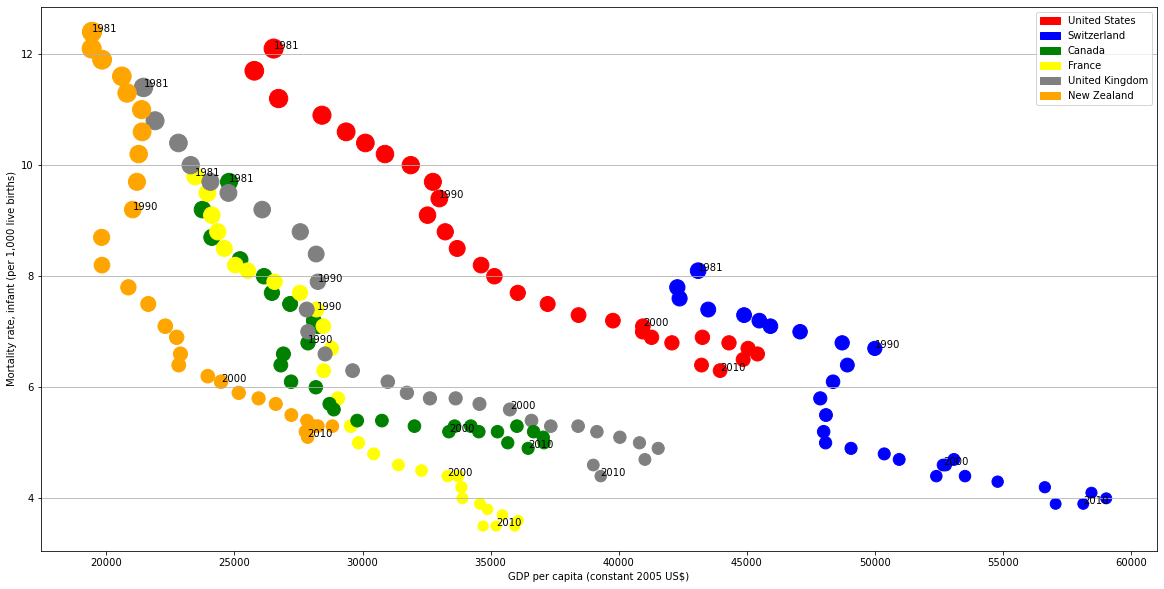

In [100]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fig, axis = plt.subplots(figsize=(20, 10))


axis.yaxis.grid(True)
axis.set_title('',fontsize=10)
axis.set_xlabel(gdp_data['IndicatorName'].iloc[0],fontsize=10)
axis.set_ylabel(mortality_data['IndicatorName'].iloc[0],fontsize=10)

X = gdp_data['Value']
Y = mortality_data['Value']
C = mortality_data['CountryName']
S = mortality_data['Value']*30
colors = {'United States':'red', 'Switzerland':'blue', 'Canada':'green', 'France':'yellow', 'United Kingdom':'grey', 'New Zealand':'orange'}

axis.scatter(X, Y, c=C.apply(lambda x: colors[x]), s=S)

for i, txt in enumerate(mortality_data['Year']):
    if txt==1981 or txt==1990 or txt==2000 or txt ==2010:
        axis.annotate(txt, (X.iloc[i], Y.iloc[i]))

red_patch = mpatches.Patch(color='red', label='United States')
blue_patch = mpatches.Patch(color='blue', label='Switzerland')
green_patch = mpatches.Patch(color='green', label='Canada')
yellow_patch = mpatches.Patch(color='yellow', label='France')
grey_patch = mpatches.Patch(color='grey', label='United Kingdom')
orange_patch = mpatches.Patch(color='orange', label='New Zealand')

plt.legend(handles=[red_patch, blue_patch,green_patch,yellow_patch,grey_patch,orange_patch])            
plt.show()